# **Providing data-driven suggestions for HR**

## Description 

This project is an opportunity to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm. They want to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, and the goal is to analyze it and build a model that predicts whether an employee will leave the company.

# **PACE stages**


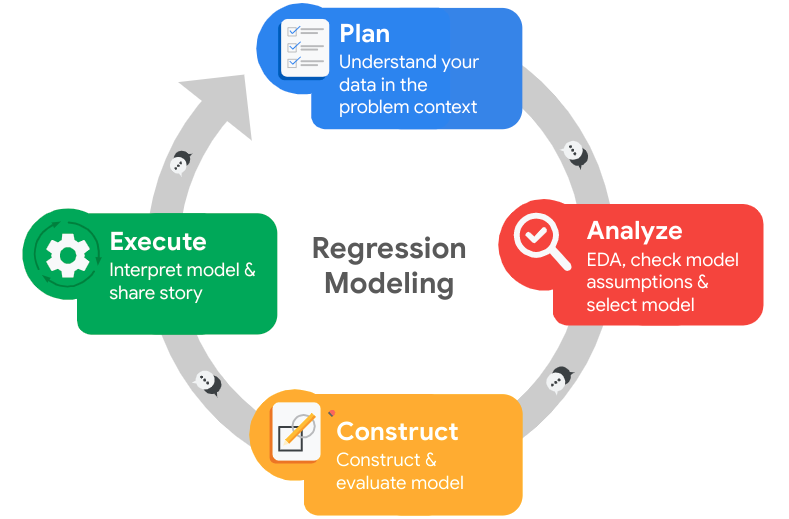

## **Pace: Plan**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They need data-driven suggestions based on the understanding of the data. They have the following question: what’s likely to make the employee leave the company?

The goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If employees likely to quit can be predicted, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Getting familiarized with the HR dataset

The dataset contains 15,000 rows and 10 columns for the variables listed below. 

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

### Import packages

In [2]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance


### Load dataset

In [ ]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

### Gather basic information about the data

In [4]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
# Rename columns 
df0 = df0.rename(columns={"number_project": "num_projects", 
                          "average_montly_hours": "avg_monthly_hrs", 
                          "time_spend_company": "time_in_company",
                         "Work_accident": "work_accident",
                         "left": "left_company",
                         "promotion_last_5years": "promotion_five",
                         "Department": "department",
                         })


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'num_projects',
       'avg_monthly_hrs', 'time_in_company', 'work_accident', 'left_company',
       'promotion_five', 'department', 'salary'],
      dtype='object')

### Check missing values

In [8]:
# Check for missing values
df0.isnull().sum()


satisfaction_level    0
last_evaluation       0
num_projects          0
avg_monthly_hrs       0
time_in_company       0
work_accident         0
left_company          0
promotion_five        0
department            0
salary                0
dtype: int64

### Check duplicates

In [9]:
# Check for duplicates
df0.duplicated().sum()


3008

In [10]:
# Inspect some rows containing duplicates as needed
duplicate_rows = df0[df0.duplicated()]
print(duplicate_rows)


       satisfaction_level  last_evaluation  num_projects  avg_monthly_hrs  \
396                  0.46             0.57             2              139   
866                  0.41             0.46             2              128   
1317                 0.37             0.51             2              127   
1368                 0.41             0.52             2              132   
1461                 0.42             0.53             2              142   
...                   ...              ...           ...              ...   
14994                0.40             0.57             2              151   
14995                0.37             0.48             2              160   
14996                0.37             0.53             2              143   
14997                0.11             0.96             6              280   
14998                0.37             0.52             2              158   

       time_in_company  work_accident  left_company  promotion_five  \
396 

In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df0_unique = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
df0_unique.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   satisfaction_level  11991 non-null  float64
 1   last_evaluation     11991 non-null  float64
 2   num_projects        11991 non-null  int64  
 3   avg_monthly_hrs     11991 non-null  int64  
 4   time_in_company     11991 non-null  int64  
 5   work_accident       11991 non-null  int64  
 6   left_company        11991 non-null  int64  
 7   promotion_five      11991 non-null  int64  
 8   department          11991 non-null  object 
 9   salary              11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


### Check outliers

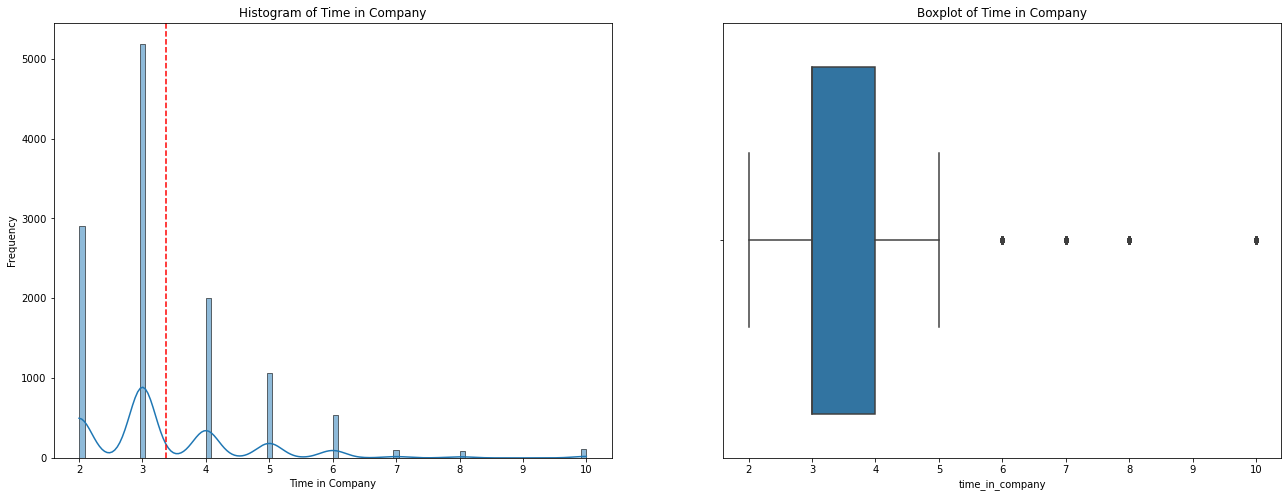

3.3648569760653824
1.3302395179523288


In [12]:
# Calculate satisfaction mean 
time_in_mean = np.mean(df0_unique["time_in_company"])

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Create histogram
sns.histplot(df0_unique["time_in_company"], kde=True, ax=ax[0])
ax[0].axvline(time_in_mean, color='red', linestyle='--')
ax[0].set_xlabel("Time in Company")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Histogram of Time in Company")

# Create boxplot
sns.boxplot(x=df0_unique["time_in_company"], ax=ax[1])
ax[1].set_title("Boxplot of Time in Company")

plt.show()
print(time_in_mean)
print(df0_unique["time_in_company"].std())

In [13]:
# Determine the number of rows containing outliers

q1 = df0_unique['time_in_company'].quantile(0.25)
q3 = df0_unique['time_in_company'].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

outliers = df0_unique[(df0_unique['time_in_company'] < lower_limit) | (df0_unique['time_in_company'] > upper_limit)]
print(outliers)

# 824 rows of outliers in time_in_company

       satisfaction_level  last_evaluation  num_projects  avg_monthly_hrs  \
1                    0.80             0.86             5              262   
17                   0.78             0.99             4              255   
34                   0.84             0.87             4              246   
47                   0.57             0.70             3              273   
67                   0.90             0.98             4              264   
...                   ...              ...           ...              ...   
11994                0.22             0.94             3              193   
11995                0.90             0.55             3              259   
11996                0.74             0.95             5              266   
11997                0.85             0.54             3              185   
11998                0.33             0.65             3              172   

       time_in_company  work_accident  left_company  promotion_five  \
1   

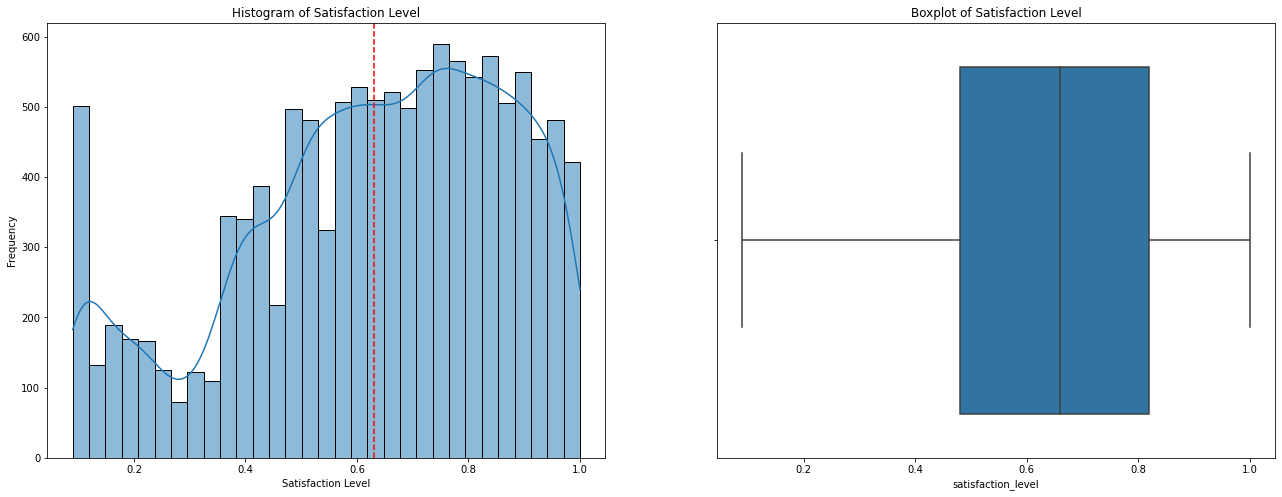

0.6296580768909951


In [14]:
# Check satisfaction_level

# Calculate satisfaction mean 
satisfaction_mean = np.mean(df0_unique["satisfaction_level"])

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Create histogram
sns.histplot(df0_unique["satisfaction_level"], kde=True, ax=ax[0])
ax[0].axvline(satisfaction_mean, color='red', linestyle='--')
ax[0].set_xlabel("Satisfaction Level")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Histogram of Satisfaction Level")

# Create boxplot
sns.boxplot(x=df0_unique["satisfaction_level"], ax=ax[1])
ax[1].set_title("Boxplot of Satisfaction Level")

plt.show()

# Satisfaction leveles are left skewed, most range from 0.4 up to 0.8 
# The mean is 0.63
print(satisfaction_mean)

In [15]:
# Check outliers of satisfaction_level
q1_satis = df0_unique["satisfaction_level"].quantile(0.25)
q3_satis = df0_unique["satisfaction_level"].quantile(0.75)
iqr_satis = q3_satis - q1_satis

outliers_satis = df0_unique[(df0_unique["satisfaction_level"] < q1_satis - 1.5 * iqr_satis) | (df0_unique["satisfaction_level"] > q3_satis + 1.5 * iqr_satis)]
print(outliers_satis)

Empty DataFrame
Columns: [satisfaction_level, last_evaluation, num_projects, avg_monthly_hrs, time_in_company, work_accident, left_company, promotion_five, department, salary]
Index: []


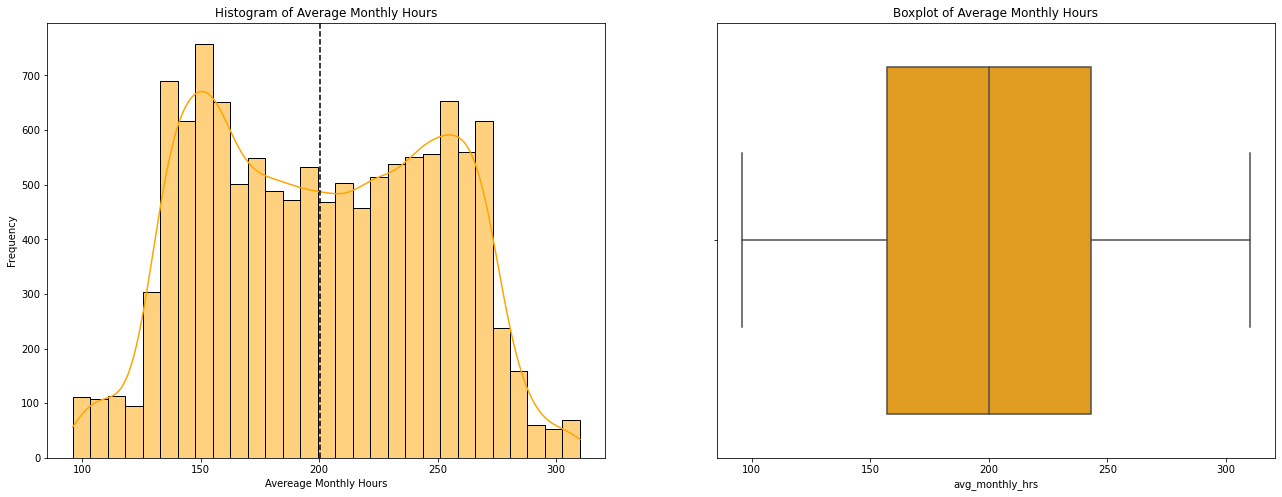

200.4735218080227


In [16]:
# Check avg_monthly_hrs

# Calculate mean 
monthly_mean = np.mean(df0_unique["avg_monthly_hrs"])

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Create histogram
sns.histplot(df0_unique["avg_monthly_hrs"], kde=True, color="orange", ax=ax[0]) 
ax[0].axvline(monthly_mean, color="black", linestyle="--")
ax[0].set_xlabel("Avereage Monthly Hours")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Histogram of Average Monthly Hours")

# Create boxplot
sns.boxplot(x=df0_unique["avg_monthly_hrs"], color="orange", ax=ax[1])
ax[1].set_title("Boxplot of Average Monthly Hours")

plt.show()

# kde = Kernel Density Estimation helps visualize the distribution of data points in a smooth, continuous curve
# mean of 200.5
print(monthly_mean)


In [17]:
# Check for outliers of avg_monthlt_hrs
q1_month = df0_unique["avg_monthly_hrs"].quantile(0.25)
q3_month = df0_unique["avg_monthly_hrs"].quantile(0.75)
iqr_month = q3_month - q1_month

outliers_month = df0_unique[(df0_unique["avg_monthly_hrs"] < q1_month - 1.5 * iqr_month) | (df0_unique["avg_monthly_hrs"] > q3_month + 1.5 * iqr_month)]
print(outliers_month)

Empty DataFrame
Columns: [satisfaction_level, last_evaluation, num_projects, avg_monthly_hrs, time_in_company, work_accident, left_company, promotion_five, department, salary]
Index: []


### Plan Stage Insights

* Business need and goal
    * The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. The goal of this project is to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.<br>
    If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.<br>
    
* Dataset info
    * It has 14,999 rows and 10 columns<br>
    satisfaction_level *float*<br>
    last_evaluation *float*<br>
    number_project *int*<br>
    average_montly_hours *int*<br>
    time_spend_company *int*<br>
    Work_accident *int*<br>
    left *int*<br>
    promotion_last_5years *int*<br>
    Department *object*<br>
    salary *object*<br>
    * All columns have 14,999 no-null values<br>
    * We performed descriptive statistics on all eight numeric columns<br>
    * Seven out of the ten column names were changed so that all of them are in snake_case:<br>
    number_project to num_projects<br>
    average_montly_hours to avg_monthly_hrs<br>
    time_spend_company to time_in_company<br>
    Work_accident to work_accident<br>
    left to left_company<br>
    promotion_last_5years to promotion_five<br>
    Department to department<br>
    * We checked for duplicates: 3008 rows<br>
    * We dropped the duplicates, the dataset now is 11991x10<br>
    * The histogram of time_in _company is right-skewed, the mean is 3.36, std = 1.33 <br>
        * Checked for outiliers in time_in_company, there are 824 rows<br>
    * The histogram of satisfaction_level is left-skewed, the mean is 0.63<br>
        * There are no outliers<br>
    * The histogram of avg_monthly_hrs it's not bell-shaped, but it appears to be almost normally distributed, the mean is 200.5<br>
        * There are no ouliers<br>
        

After doing the initial datset inspection and cleaning (getting size, info, descriptive analytitcs, etc.), we selected time_in_company, satisfaction_level and avg_monthly_hrs as the main variables to check in this stage.<br>

Based on the histograms and boxplots: <br>
* For **time_in_company**, the shape of the distribution suggests that a larger proportion of the data is concentrated at lower values, with fewer observations at higher values. This tells us most of the employees are located on the lower side of time spend working fo the company.<br> 
* The distribution of **satisfaction_level** works to the contrary of time_in_company, a larger proportion of the data is concentrated at higher values, with fewer observations at lower values. From this we can take away that the satisfaction is postly positive.<br> 
* The histogram for **avg_monthly_hrs** appears to be approximately normally distributed. This means the data is clustered around a central value, with the frequency gradually decreasing as you move away from the center in both directions. 



# Pace: Analyze Stage

## Step 2. Data Exploration (Continue EDA)

In [18]:
# Get numbers of people who left vs. stayed
print(df0_unique["left_company"].value_counts())
# Get percentages of people who left vs. stayed
pie_chart = df0_unique["left_company"].value_counts(normalize=True)
print(pie_chart)
# 16.6% left
# 83.4% stayed

0    10000
1     1991
Name: left_company, dtype: int64
0    0.833959
1    0.166041
Name: left_company, dtype: float64


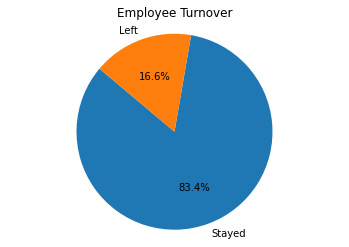

In [19]:
# Pie chart of employees that stayed/left
plt.pie(pie_chart, labels=['Stayed', 'Left'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Employee Turnover')
plt.show()

### Data visualizations

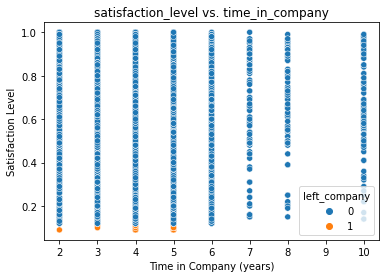

In [20]:
# Scatter plot for satisfaction_level versus time_in_company 

sns.scatterplot(x="time_in_company", y="satisfaction_level", hue='left_company', data=df0_unique)

plt.xlabel("Time in Company (years)")
plt.ylabel("Satisfaction Level")
plt.title("satisfaction_level vs. time_in_company")

plt.show()

# The lowest satisfaction levels come from employees who left on the 2-5 year mark


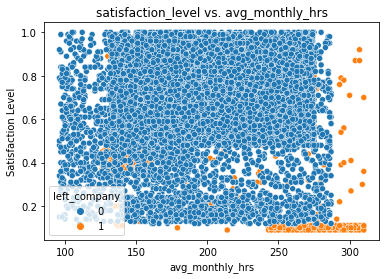

In [21]:
# Create a plot as needed
sns.scatterplot(x="avg_monthly_hrs", y="satisfaction_level", hue='left_company', data=df0_unique)

plt.xlabel("avg_monthly_hrs")
plt.ylabel("Satisfaction Level")
plt.title("satisfaction_level vs. avg_monthly_hrs")

plt.show()

# The most employees who left had the lowest satisfaction levels and the most monthly hours (between ~250 and 300)
# Even tho some of the employees who left had the most hours, some of them appear to have higher satisfaction levels

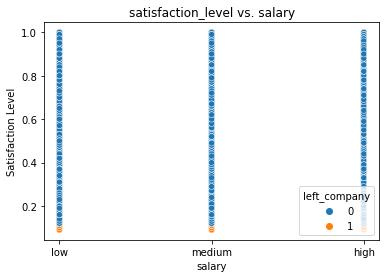

In [22]:
# satisfaction_level vs salary
sns.scatterplot(x="salary", y="satisfaction_level", hue='left_company', data=df0_unique)

plt.xlabel("salary")
plt.ylabel("Satisfaction Level")
plt.title("satisfaction_level vs. salary")

plt.show()

# From the three salary categories, the employees who left were the ones with the lowest satisfaction scores


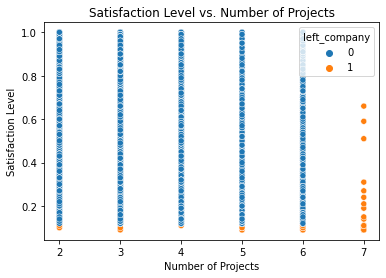

In [23]:
# satisfaction_level vs num_project
sns.scatterplot(x="num_projects", y="satisfaction_level", hue='left_company', data=df0_unique)

plt.xlabel("Number of Projects")
plt.ylabel("Satisfaction Level")
plt.title("Satisfaction Level vs. Number of Projects")

plt.show()

# For 1 through 6 projects, the employees that left were the ones with the lowest satisfaction levels
# For the employees with 7 projects, all left

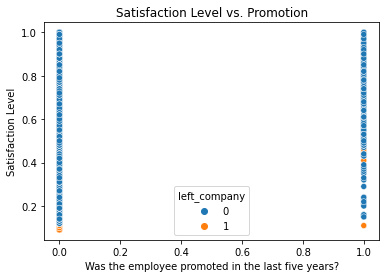

In [24]:
# satisfaction_level vs promotion_five
sns.scatterplot(x="promotion_five", y="satisfaction_level", hue='left_company', data=df0_unique)

plt.xlabel("Was the employee promoted in the last five years?")
plt.ylabel("Satisfaction Level")
plt.title("Satisfaction Level vs. Promotion")

plt.show()

# For the employees that didn't get promoted, only the ones with the lowest satisfaction levels left
# For the employees that did get promoted, the ones with the lowest satisfaction levels also left,
# but it appears some of them with a higher satisfaction level left, too

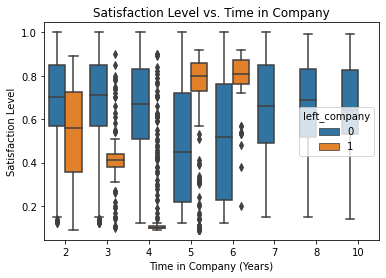

In [25]:
# Boxplot of time_in_company and satisfaction_level to get a more specific scenario of how they behave

sns.boxplot(x='time_in_company', y='satisfaction_level', hue='left_company', data=df0_unique)

plt.xlabel('Time in Company (Years)')
plt.ylabel('Satisfaction Level')
plt.title('Satisfaction Level vs. Time in Company')

plt.show()

# The most people who left stayed at the company for a little over 2 years, with a satisfaction level in the medium level
# There are some employees that left that had between 5 and 6 years at the company with a higher satisfaction level 
# (higher than the average of 0.63)
# On the four year mark there seems to be a lower satisfaction level on the employees who left

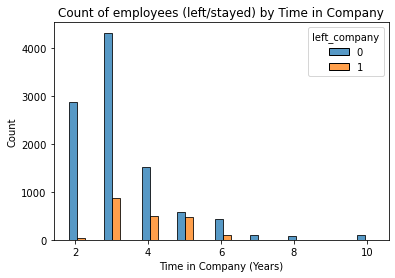

In [26]:
# Count of employees (left/stayed) by Time in Company

sns.histplot(data=df0_unique, x="time_in_company", hue="left_company", shrink=5, multiple="dodge")

plt.xlabel("Time in Company (Years)")
plt.ylabel("Count")
plt.title("Count of employees (left/stayed) by Time in Company")

plt.show()

# Most of the employees left at the 3 year mark, then 4, then 5

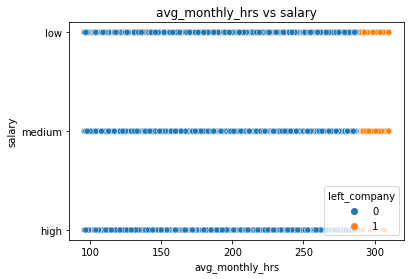

In [27]:
# monthly hours vs salary
sns.scatterplot(x="avg_monthly_hrs", y="salary", hue='left_company', data=df0_unique)

plt.xlabel("avg_monthly_hrs")
plt.ylabel("salary")
plt.title("avg_monthly_hrs vs salary")

plt.show()

# No matter the salary category, the employees who left had, in average, more monthly hours

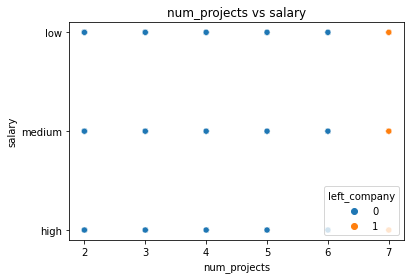

In [28]:
# num_projects vs salary

sns.scatterplot(x="num_projects", y="salary", hue='left_company', data=df0_unique)

plt.xlabel("num_projects")
plt.ylabel("salary")
plt.title("num_projects vs salary")

plt.show()

# No matter the salary, the employees who left had more projects

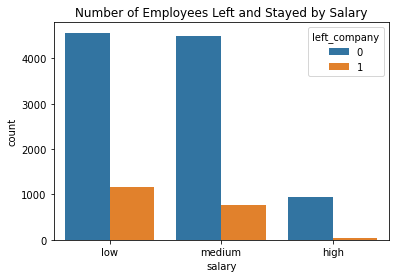

In [29]:
# Employees that stayed/left by salary
sns.countplot(x='salary', hue='left_company', data=df0_unique)
plt.title('Number of Employees Left and Stayed by Salary')
plt.show()

# More employees with lower salary left

In [30]:
# Get proportions of people that left/stayed by salary

# Group the data by `department` and count the total occurrences
total_counts_by_salary = df0_unique.groupby("salary").size()

# Group the data by "left_company" and "salary" and count the occurrences
salary_data = df0_unique.groupby(["left_company", "salary"]).size().reset_index(name='count')

# Calculate the proportion for each salary category within each `left_company` category
salary_data['proportion'] = salary_data['count'] / salary_data["salary"].map(total_counts_by_salary)

proportion_salary_df = pd.DataFrame(salary_data)

print(proportion_salary_df)

print(df0_unique["salary"].value_counts())

# High salary            # Medium salary         # Low salary
# Left 0.05              # Left 0.15             # Left 0.20
# Stayed 0.95            # Stayed 0.85           # Stayed 0.80

   left_company  salary  count  proportion
0             0    high    942    0.951515
1             0     low   4566    0.795470
2             0  medium   4492    0.853830
3             1    high     48    0.048485
4             1     low   1174    0.204530
5             1  medium    769    0.146170
low       5740
medium    5261
high       990
Name: salary, dtype: int64


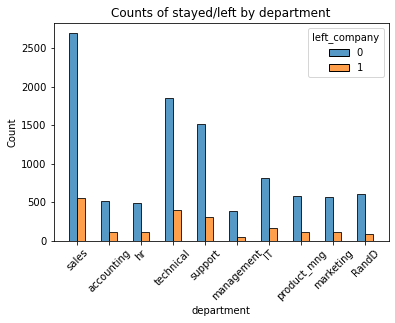

In [31]:
# Employees that stayed/left by department

sns.histplot(data=df0_unique, x="department", hue="left_company", discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation="45")
plt.title("Counts of stayed/left by department");

# The department with more employees that left were sales, then technical, then support

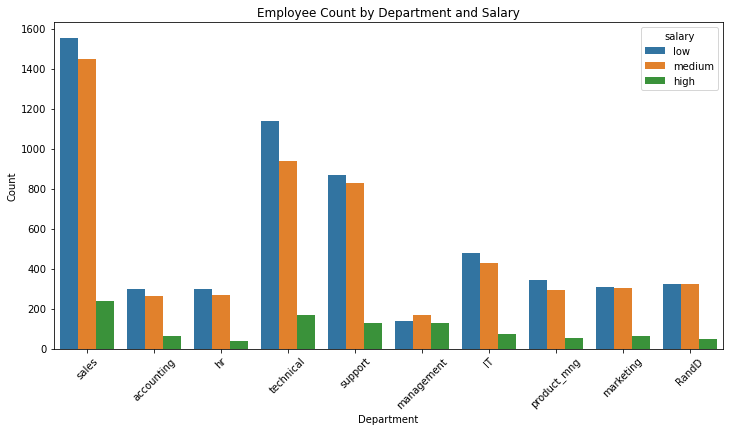

In [32]:
# More info on sales, technical and support
# Why are they leaving more than the others?
# Scatterplot of salary vs department

plt.figure(figsize=(12, 6))

sns.countplot(x="department", hue="salary", data=df0_unique)

plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Employee Count by Department and Salary")

plt.xticks(rotation=45)  
plt.show()

# The biggest department is sales, then technical, then support
# That might be the reason those departments show more people left tha 
# Most of their salaries are low and medium

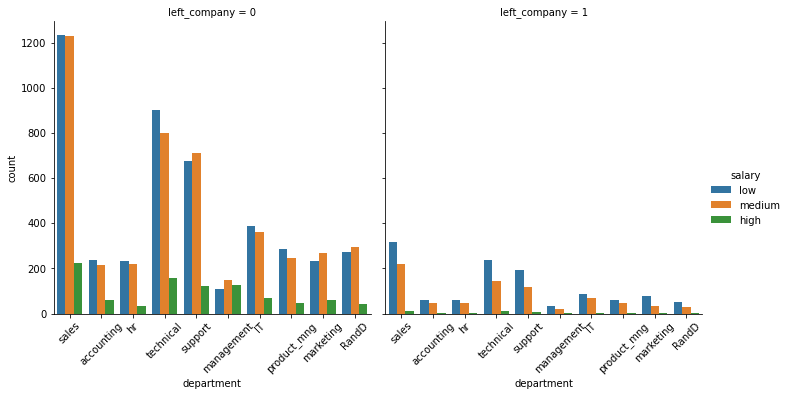

In [33]:
# Scatterplot of salary vs department with left_company comparison

g = sns.catplot(x='department', hue='salary', col='left_company',
                data=df0_unique, kind='count')

g.set_xticklabels(rotation=45)

plt.show()

In [34]:
# Get proportions of people that left each department 

# Group the data by `department` and count the total occurrences
total_counts_by_department = df0_unique.groupby('department').size()

# Group the data by `left_company` and `department` and count the occurrences
grouped_data = df0_unique.groupby(['left_company', 'department']).size().reset_index(name='count')

# Calculate the proportion for each department within each `left_company` category
grouped_data['proportion'] = grouped_data['count'] / grouped_data['department'].map(total_counts_by_department)

proportion_df = pd.DataFrame(grouped_data)

print(proportion_df)

print(df0_unique["department"].value_counts()) # to have value total of each department

# Even though in the charts above there seemed to be more employees who left from sales, technical, and support
# by checking the proportions we can see the numbers are pretty even 
# So the department were they're coming from is not a reason for them leaving

    left_company   department  count  proportion
0              0           IT    818    0.838115
1              0        RandD    609    0.877522
2              0   accounting    512    0.824477
3              0           hr    488    0.811980
4              0   management    384    0.880734
5              0    marketing    561    0.833581
6              0  product_mng    576    0.839650
7              0        sales   2689    0.830195
8              0      support   1509    0.828666
9              0    technical   1854    0.826203
10             1           IT    158    0.161885
11             1        RandD     85    0.122478
12             1   accounting    109    0.175523
13             1           hr    113    0.188020
14             1   management     52    0.119266
15             1    marketing    112    0.166419
16             1  product_mng    110    0.160350
17             1        sales    550    0.169805
18             1      support    312    0.171334
19             1    

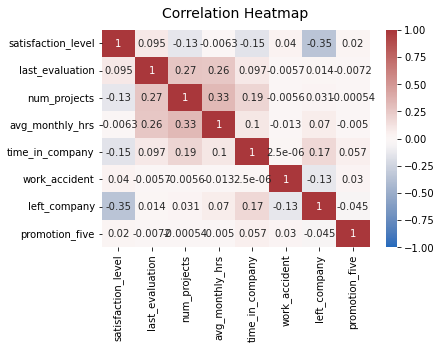

In [ ]:
#plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0_unique.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);


**Higher correlation between:**<br> 
* last_evaluation and num_projects
* last_evaluation and avg_monthly_hrs
* num_projects and avg_montly_hrs

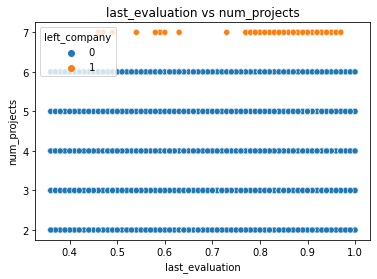

In [36]:
# last_evaluation and num_projects

sns.scatterplot(x="last_evaluation", y="num_projects", hue='left_company', data=df0_unique)

plt.xlabel("last_evaluation")
plt.ylabel("num_projects")
plt.title("last_evaluation vs num_projects")

plt.show()

# The people with more project left the most, even with a higher evaluation

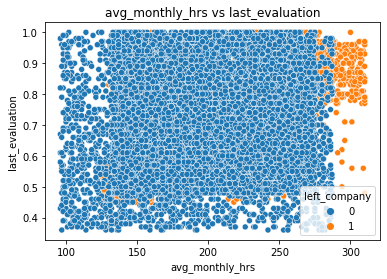

In [37]:
# last_evaluation and avg_monthly_hrs
#plt.figure(figsize=(16, 9))
sns.scatterplot(x="avg_monthly_hrs", y="last_evaluation", hue='left_company', data=df0_unique)

plt.xlabel("avg_monthly_hrs")
plt.ylabel("last_evaluation")
plt.title("avg_monthly_hrs vs last_evaluation")

plt.show()

# For people that left: less avg monthly hours, less evaluation score
# Or more hours, higher evaluation score


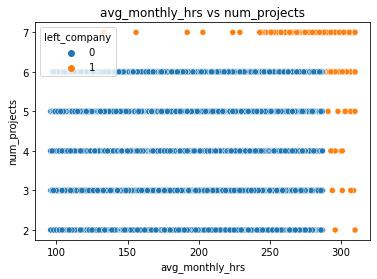

In [38]:
# num_projects and avg_montly_hrs

#plt.figure(figsize=(16, 9))
sns.scatterplot(x="avg_monthly_hrs", y="num_projects", hue='left_company', data=df0_unique)

plt.xlabel("avg_monthly_hrs")
plt.ylabel("num_projects")
plt.title("avg_monthly_hrs vs num_projects")

plt.show()

# The more projects, the more employees left
# higher hours and larger number of projects meant more employees left


### Analyze Stage Insights

From the 11,991 employees left in the dataset (after removing duplicates):
10,000 (83.4%) stayed and 1,991(16.6%) left<br>

The initial intuition was that satisfaction_level could give us some insights about the company turnover, so we compared this variable against some others in various charts, always making the distinction of employees that stayed or left.

* **satisfaction_level** versus **time_in company**:
    * The scatter plot shows that employees who left were on the 2-5 year mark and had the lowest satisfaction levels of said years.<br>
    * Apart from that, the employees that stayed are present on all satisfaction levels, it looks constant from year 2-6, from year 7 and 8 there are less values, none for 9 year employees, and again constant satisfaction levels for 10 year employees.
* **satisfaction_level** versus **avg_monthly_hrs**:
    * The scatter plot shows that the most employees that left had lower satisfaction levels and the most monthly hours (between ~250 and ~300)<br>
    * Also, even though some of the employees that left had the most hours, there are some higher satisfaction levels present.
* **satisfaction_level** versus **salary**:
    * From the three salary categories, the employees who left were the ones with the lowest satisfaction scores.
* **satisfaction_level** versus **num_projects**:
    * For 2-6 projects, the employees that left were the ones with the lowest satisfaction levels.<br>
    * For the employees with 7 projects, all left, no matter the satisfaction level. 
* **satisfaction_level** versus **promotion**:
    * For the employees that didn't get promoted, only the ones with the lowest satisfaction levels left.<br>
    * For the employees that did get promoted, the ones with the lowest satisfaction levels also left, but it appears some of them with a higher satisfaction level left, too. 

**Conclusions for satisfaction versus variables**<br>

It shows all the employees that left were from years 2 to 5, why would that be?<br>
From the employees that left: more hours = less satisfaction = gone. (With some exceptions).<br>
The intuition was that the lower the salary maybe more employees left, but it seems that employees left no matter the salary category, all had low satisfaction levels.<br>
The most projects (7) = gone.<br>
Being promoted was not a reason to stay, to the contrary it appears more employees left from the ones that were promoted in the last five years.<br>

From this charts we can conclude that the lowest satisfaction levels show a larger number of employees that left.<br> 
From time_company and salary, only the ones with lower satisfaction left.<br>
From avg_monthly_hrs, num_projects, and promotion, the employees that left also had low satisfaction levels, but there were some of them with higher satisfaction.<br>
More hours/month, more projects, and having a promotion in the last five years meant more people leaving.

**More visualizations**

* We created a boxplot of satisfaction_level and time_in_company to get a more specific view of the variables behavior:<br>
    * The most people who left stayed at the company for a little over 2 years, with a satisfaction level almost reaching the mean of 0.63.
    * There are some employees that left that had 5 and 6 years at the company with a higher satisfaction level (~0.8)
    * On the four year mark there seems to be a lower satisfaction level on the employees who left.
    * From employees that stayed: For the first 3 years, the boxes don't change much. From year 5 and 6, the values drop. Year 7, 8, and 9 show an increase in satisfaction.
    * From employees that left: year 4 has 50% of the values with less than 0.2 in satisfaction. Employees in the 5 and 6 year mark have higher satisfaction levels.


* Count of employees (left/stayed) by Time in Company
    * Year 3 is the one with largest number of employees that left.

* monthly_hours vs salary:
    * No matter the salary category, the employees who left had, in average, more monthly hours

* num_projects vs salary
    * No matter the salary, the employees who left had more projects

* Employees that stayed/left by salary
    * More employees with lower salary left
    * 20% of people with low salaries left
    * 15% of people with medium salaries left
    * 5% of people with high salaries left

* Employees that stayed/left by department
    * The department with more employees that left were sales, then technical, then support.
    * Why are they leaving more than the others?

* Scatterplot of salary vs department
    * The biggest departments are sales, then technical, then support (that might be the reason those departments show more people left than the others). Most of their salaries are low and medium.

* Get proportions of people that left each department
    * Even though in the charts above there seemed to be more employees who left from sales, technical, and support by checking the proportions we can see the numbers are pretty even. So the department were they're coming from is not a reason for them leaving.

* From the heatmap:
    * Higher correlation between:
        * last_evaluation and num_projects
            The people with more projects left the most, even with a higher evaluation.
        * last_evaluation and avg_monthly_hrs
            For people that left: less average monthly hours, less evaluation score or more hours, higher evaluation score.
        * num_projects and avg_montly_hrs
            The more projects, the more employees left.
            Higher hours and larger number of projects meant more employees left.
          


# PACE: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building
## Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the types of models most appropriate for this task.

The outcome variable we need is categorical, so we need a classification model. The outcome is binary (whether the employee leaves or not) so a logistic regression model or tree-based would be the best options for this.

Given the binary nature of the outcome, a logistic model is the one that is going to be used.We chose a binomial logistic regresion model given that the task was binary: whether an employee leaves the company. And because the variable is also categorical.

### Binomial Logistic Regression Model

#### Encode categorical variables

The outcome variable is going to be *left_company*, with 1 for left and 0 for stayed.<br>
From the ten variables, only two are not numerical: *department* and *salary*.<br>
*Department* is going to need encoding to separate all the unique departments.<br>
*Salary* has only three options, so a numeric representation of each one will suffice. (Zero for low, one for medium, two for high).

In [39]:
# Copy of dataset
df1 = df0_unique.copy()

# Encode categorical variables

# On-hot encoding for deparment
df1 = pd.get_dummies(df1, columns=["department"])

# Label encoding for salary
salary_mapping = {"low": 0, "medium": 1, "high": 2}
df1["salary_encoded"] = df1['salary'].map(salary_mapping)

# Drop salary column
df1.drop(["salary"], axis=1, inplace=True)

df1.head()

,satisfaction_level,last_evaluation,num_projects,avg_monthly_hrs,time_in_company,work_accident,left_company,promotion_five,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_encoded
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0


#### Create a heatmap to visualize how correlated variables are

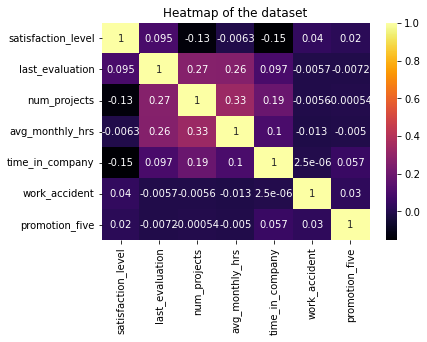

In [40]:
# Plot heatmap

#plt.figure(figsize=(16, 9))
sns.heatmap(df1[["satisfaction_level", "last_evaluation", "num_projects", "avg_monthly_hrs", "time_in_company", "work_accident", "promotion_five"]]
            .corr(), annot=True, cmap="inferno")
plt.title('Heatmap of the dataset')
plt.show()

#### Drop outliers 

Logistic regression models are sensitive to outliers, so let's drop the ones we found earlier in time_in_company.

In [41]:
# Drop outliers of time_in_company
df2 = df1[(df1["time_in_company"] >= lower_limit) & (df1["time_in_company"] <= upper_limit)]

df2.head()

,satisfaction_level,last_evaluation,num_projects,avg_monthly_hrs,time_in_company,work_accident,left_company,promotion_five,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_encoded
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0


#### Isolate y and X variables

The outcome variable (y) is left_company.<br>
The independent variables (X) are the rest of them.

In [42]:
# Isolate the outcome variable
y = df2["left_company"]

# Display first few rows of the outcome variable
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left_company, dtype: int64

In [43]:
# Select the features you want to use in your model
X = df2.drop("left_company", axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,num_projects,avg_monthly_hrs,time_in_company,work_accident,promotion_five,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_encoded
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,1,0,0,0


#### Split the data

Time to divide the data into training and hold out datasets.<br>
25% of the data was left to test the model.

In [44]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

#### Construct the model

In [45]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [46]:
# Get beta coefficients for independent variables

log_clf.coef_

array([[-4.35040495e+00, -1.54469876e-03, -4.86566004e-01,
         3.59532543e-03,  1.10251291e+00, -1.50550650e+00,
        -1.15775463e+00, -8.32613113e-02, -3.27155787e-01,
        -2.90527465e-01, -6.73705417e-03, -1.99042663e-01,
        -1.17018081e-01, -1.04369302e-01,  3.08062689e-02,
         3.63083652e-02,  3.71310580e-02, -5.30159479e-01]])

In [47]:
# Get beta 0
log_clf.intercept_

array([-1.31602335])

In [48]:
# Get odds ratio 
satisfaction_odds = np.exp(log_clf.coef_[0][0])
last_eva_odds = np.exp(log_clf.coef_[0][1])
num_projects_odds = np.exp(log_clf.coef_[0][2])
hours_odds = np.exp(log_clf.coef_[0][3])
time_odds = np.exp(log_clf.coef_[0][4])
accident_odds = np.exp(log_clf.coef_[0][5])
promotion_odds = np.exp(log_clf.coef_[0][6])
it_odds = np.exp(log_clf.coef_[0][7])
randD_odds = np.exp(log_clf.coef_[0][8])
account_odds = np.exp(log_clf.coef_[0][9])
hr_odds = np.exp(log_clf.coef_[0][10])
management_odds = np.exp(log_clf.coef_[0][11])
marketing_odds = np.exp(log_clf.coef_[0][12])
product_mng_odds = np.exp(log_clf.coef_[0][13])
sales_odds = np.exp(log_clf.coef_[0][14])
support_odds = np.exp(log_clf.coef_[0][15])
technical_odds = np.exp(log_clf.coef_[0][16])
salary_odds = np.exp(log_clf.coef_[0][17])

In [49]:
# Print values for interpretation

print(f"satisfaction_level: {satisfaction_odds:.5f}")
print(f"last_evaluation: {last_eva_odds:.5f}")
print(f"num_projects: {num_projects_odds:.5f}")
print(f"avg_monthly_hrs: {hours_odds:.5f}")
print(f"time_in_company: {time_odds:.5f}")
print(f"work_accident: {accident_odds:.5f}")
print(f"promotion_five: {promotion_odds:.5f}")
print(f"department_IT: {it_odds:.5f}")
print(f"department_RanD: {randD_odds:.5f}")
print(f"department_accounting: {account_odds:.5f}")
print(f"department_hr: {hr_odds:.5f}")
print(f"department_management: {management_odds:.5f}")
print(f"department_marketing: {marketing_odds:.5f}")
print(f"department_product_mng: {product_mng_odds:.5f}")
print(f"department_sales: {sales_odds:.5f}")
print(f"department_support: {support_odds:.5f}")
print(f"department_technical: {technical_odds:.5f}")
print(f"salary_encoded: {salary_odds:.5f}")

satisfaction_level: 0.01290
last_evaluation: 0.99846
num_projects: 0.61473
avg_monthly_hrs: 1.00360
time_in_company: 3.01172
work_accident: 0.22190
promotion_five: 0.31419
department_IT: 0.92011
department_RanD: 0.72097
department_accounting: 0.74787
department_hr: 0.99329
department_management: 0.81951
department_marketing: 0.88957
department_product_mng: 0.90089
department_sales: 1.03129
department_support: 1.03698
department_technical: 1.03783
salary_encoded: 0.58851


By considering all the other variables constant:<br>

* For a one-unit increase in satisfaction level, the odds of an employee leaving decrease by approximately 98.7%
* For a one-unit increase in last evaluation, the odds of an employee leaving decrease by approximately 0.154%
* For a one-unit increase in num_projects, the odds of an employee leaving decrease by approximately 38.527%
* For each additional hour worked per month, the odds of an employee leaving increase by approximately 0.36%
* For each additional year of tenure in the company, the odds of an employee leaving increase by approximately 301%
* Employees who have experienced a work accident are approximately 78% less likely to leave the company compared to those who haven't
* Employees who have received a promotion in the past five years are approximately 69% less likely to leave the company compared to those who haven't
* Employees in the IT department are approximately 8% less likely to leave the company compared to employees in other departments, holding other factors constant
* Employees in the RandD department are approximately 28% less likely to leave the company compared to employees in other departments
* Employees in the accounting department are approximately 25% less likely to leave the company compared to employees in other departments
* Employees in the HR department are approximately 0.7% less likely to leave the company compared to employees in other departments
* Employees in the management department are approximately 18% less likely to leave the company compared to employees in other departments
* Employees in the marketing department are approximately 11% less likely to leave the company compared to employees in other departments
* Employees in the product management department are approximately 10% less likely to leave the company compared to employees in other departments
* Employees in the sales department are approximately 3% more likely to leave the company compared to employees in other departments
* Employees in the support department are approximately 4% more likely to leave the company compared to employees in other departments
* Employees in the technical department are approximately 4% more likely to leave the company compared to employees in other departments
* A one-unit increase in the salary level, the odds of an employee leaving the company decrease by approximately 41%

#### Test the model

In [50]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

In [51]:
# Print out the predicted labels
log_clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
# Print out the predicted probabilities
y_pred_proba = log_clf.predict_proba(X_test)[::,-1]

#### Plot a Confusion Matrix

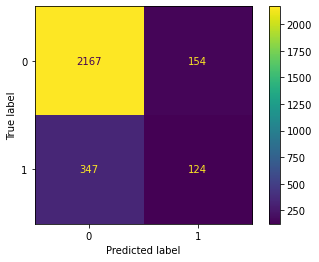

In [53]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

A confusion matrix helps summarize the performance of a classifier.<br>
The upper-left cuadrant represents the count of observations that the classifier correctly predicted as False (0).<br>
The lower-right cuadrant is the count of observations that the classifier correctly predicted as True (1).<br>
The upper-right cuadrant represents the count of observations that the classifier incorrectly predicted as True (1).<br>
The lower-left quedrant is the count of observations that a classifier incorrectly predicted as False (0). <br>


From the 2792 values that we assigned to the test data:
* 2167 were True Negatives. Employees that the model predicted were going to stay, and they actually stayed.
* 124 were True Positives. Employees that the model predicted were going to leave, and they actually left.
* 154 were False Positives. Employees the model predicted going to leave, but actually they stayed.
* 347 were False Negatives. Employees the model predicted were going to stay, but they actually left.


#### Check balance

In [54]:
df2["left_company"].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left_company, dtype: float64

From the dataset: 83% of employees stayed. 17% left.
This is not the most balanced dataset, but given than major issues only arise when the majority class makes up for the 90% or more of the dataset, then we can proceed with this percentage.

In [55]:
# Create classification report for logistic regression model
target_names = ["Predicted would not leave", "Predicted would leave"]
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.45      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



# PACE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Model performance evaluation using metrics
* Precision:<br>
Predicted would not leave: 86% of the instances predicted as "would not leave" were actually correct.<br>
Predicted would leave: 45% of the instances predicted as "would leave" were actually correct.
* Recall:<br>
Predicted would not leave: 93% of the actual "would not leave" instances were correctly predicted.<br>
Predicted would leave: 26% of the actual "would leave" instances were correctly predicted.
* Accuracy:<br>
Overall, the model correctly predicted 82% of the instances.<br>
* F1-Score:<br>
Predicted would not leave: 90% <br>
Predicted would leave: 33%


* Beta coefficients<br>
    * **More satisfaction, less turnover** (one-unit increase in *satisfaction_level*, the odds of an employee leaving decrease by approximately 98.7%)
    * **Higher evaluation, less turnover** (not as much as satisfaction, but for a one-unit increase in *last_evaluation*, the odds of an employee leaving decrease by approximately 0.154%
    * **More projects, less turnover** (one-unit increase in num_projects, the odds of an employee leaving decrease by approximately 38.527%)
    * **More hours in a month, more turnover** fFor each additional hour worked per month, the odds of an employee leaving increase by approximately 0.36%)
    * **More years in the company, more turnover** (for each additional year of tenure in the company, the odds of an employee leaving increase by approximately 301%)
    * **Getting a promotion, less turover** (employees who have received a promotion in the past five years are approximately 69% less likely to leave the company compared to those who haven't)
    * The departments with higher odds of turnover are: **sales (3%), support (4%), and technical (4%)**
    * **More salary, less turnover** (a one-unit increase in the salary level means the odds of an employee leaving the company decrease by approximately 41%)





### Visualizations

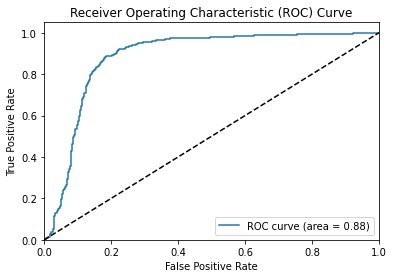

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ... (your model training and prediction code)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
  # Corrected line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Conclusion, Recommendations, Next Steps

#### Conclusion

The model has a precision of 86% for predicted would not leave and 45% for predicted would leave.<br>
Recall had a 93% for predicted would not leave and 26% for predicted would leave.br>
For accuracy, the model correctly predicted 82% of the instances.<br>
For the F1-Score, the model predicted 90% for would not leave and 33% for predicted would leave.<br>
Class Imbalance: The model seems to be biased towards the "would not leave" class, as evidenced by the higher precision and recall for this class. This could be due to an imbalance in the training data. Consider techniques like oversampling, undersampling, or class weighting to address this issue.<br>
Low Recall for "Would Leave": The low recall for the "would leave" class indicates that the model struggles to identify actual "would leave" instances. This might be due to a lack of informative features or insufficient training data for this class. Consider feature engineering or collecting more data to improve performance.<br>
The ROC curve shows that this is a good model, given that the curve is closer to the top-left corner (the model is better at classifying the data).

* More hours/month, more projects, and having a promotion in the last five years meant more people leaving.
* On the four year mark there seems to be a lower satisfaction level on the employees who left.
* No matter the salary category, the employees who left had, in average, more monthly hours.
* The people with more projects left the most, even with a higher evaluation.
* For people that left: less average monthly hours = less evaluation score or more hours = higher evaluation score.
* The more projects, the more employees left. 
* Higher hours and larger number of projects meant more employees left.

#### Recommendations

* We suggest having a limited amount of projects an employee can have. To reduce burnout and increase productivity.<br>
* There should also be discussions about working extra time. Either with already enrolled employees (so that no one works more than they physically/mentally could) and also consider the legal amount of hours a person can work in France (research shows is a max of 10 hours/day, some sources say 35 hours/week). This information should also be provided to applicants as they engage in the interview process.
* There should also be fair compensation for working more hours.
* Investigate the reason of having a so-low satisfaction level on employees that left at the four year mark.
* The higher evaluation scores should go to the employees that deserve them and not only to employees that worked more hours.
* Make sure the employees know that the company is set on having a good work environment, schedule meetings so the topic can be discussed and find the issues the employees have with the company's culture, so the satisfaction can increase.

#### Next steps

* Share the results of the model to see if it worked as expected.
* As for the model, there are some adjustments that should be made (as mention in the conclusion section).
* There should also be a follow-up of the recommendations and their results.